In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Multiclass Diabetes Dataset.csv")
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [4]:
df.tail()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0,2
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6,2
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0,2
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,2
263,1,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [6]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


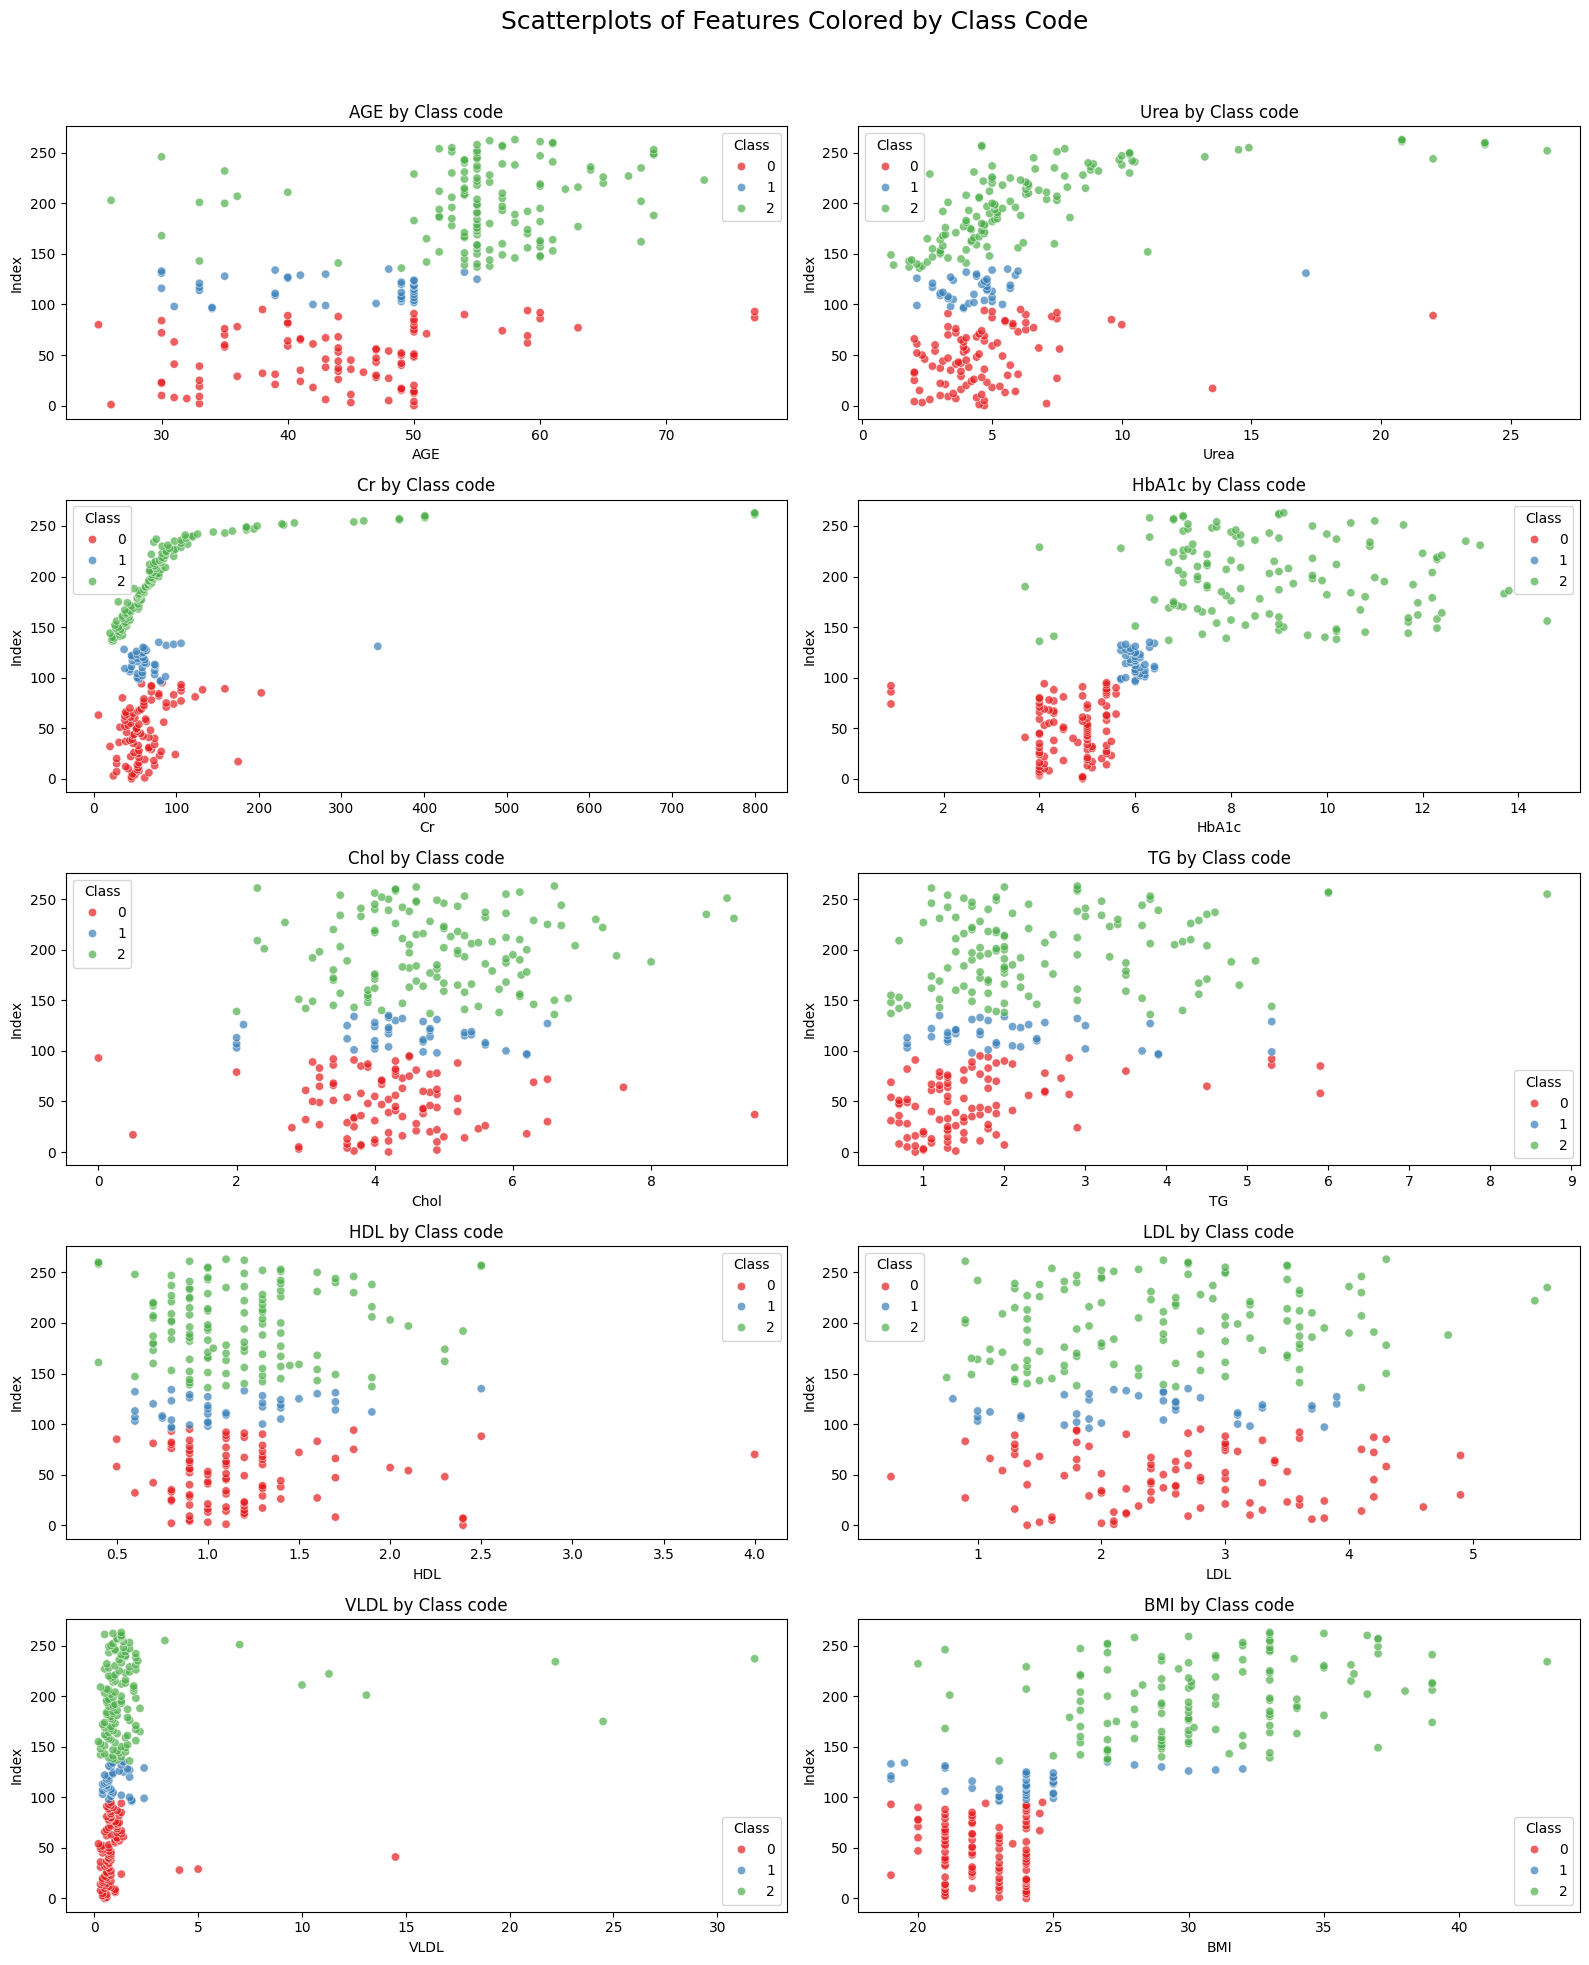

In [302]:
features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
target = 'Class'

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,20))
fig.suptitle('Scatterplots of Features Colored by Class Code', fontsize=18)
axes = axes.flatten()

for i, col in enumerate(features):
    sns.scatterplot(x=df[col], y=range(len(df)), hue=df[target], ax=axes[i], palette='Set1', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Index")
    axes[i].set_title(f'{col} by Class code')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

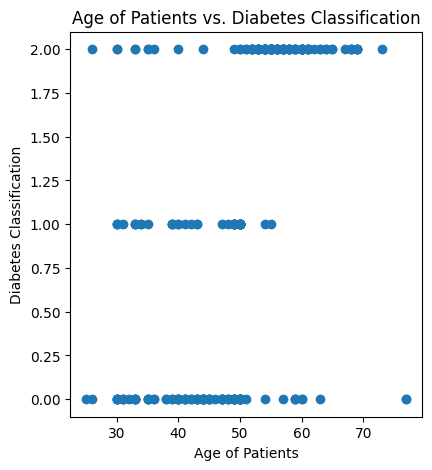

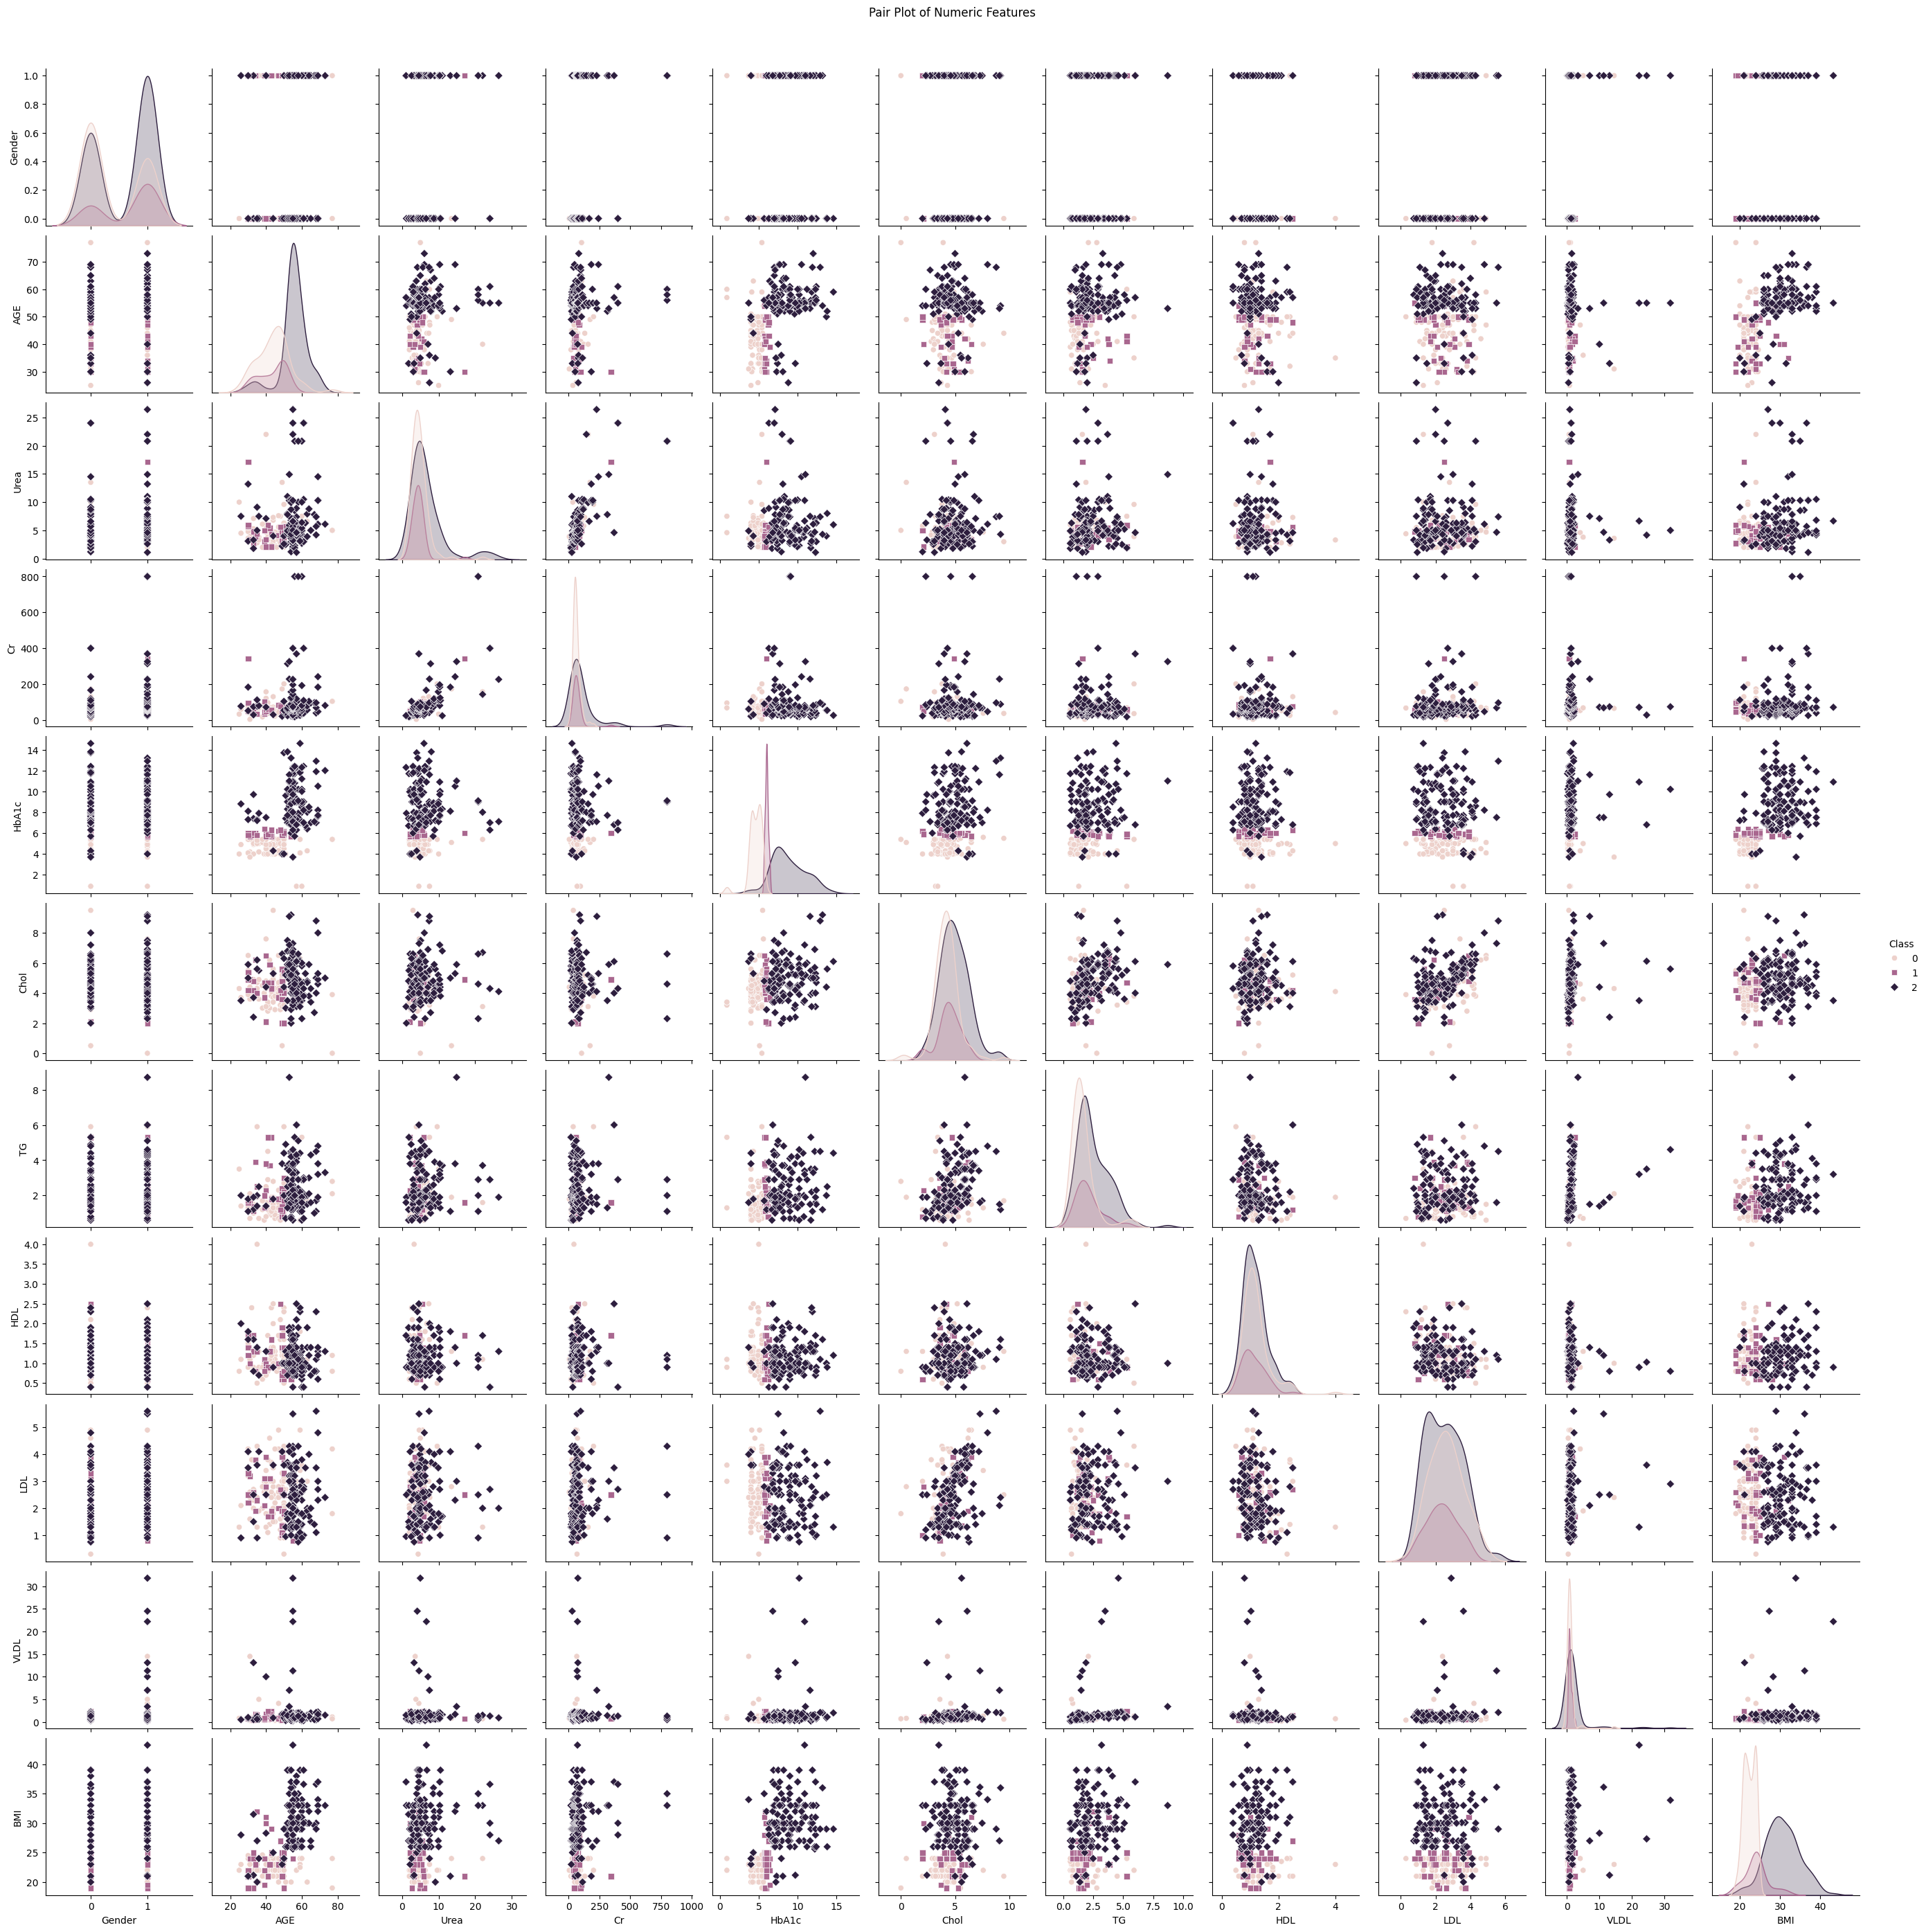

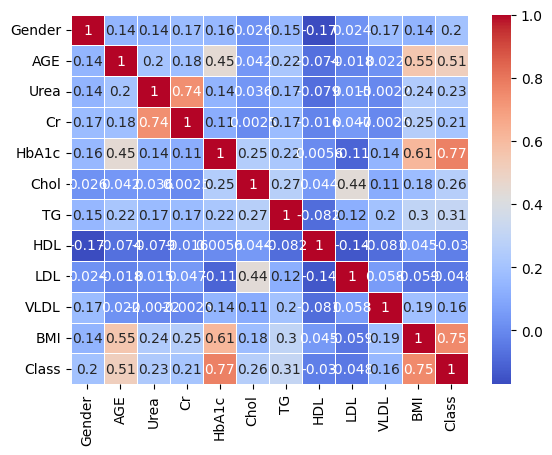

In [26]:
if df.shape[1] >= 2:
    sns.pairplot(df, hue='Class', markers=["o", "s", "D"], diag_kind='kde')
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

if df.shape[1] >= 4:
    corr = df.corr()
    sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=.5)

The Pairplot and the Heatmap both give us some intuition in how the diabetes classification might be handled. There is a lot of data, but the main focal point of these plots is visually seeing the correlation between the features and the 'Class'. For example, using the bottom row of the heatmap we can see that 'Gender' has little correlation to whether a patient might have diabetes, but if we shift our sights to 'BMI' on the same row, the values are much higher which indicates that BMI might be important in classifying whether a patient has diabetes or not. 

In [33]:
X = df.drop('Class', axis=1)
Y = df['Class']

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Accuracy Percentage:  89.62264150943396
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.75      0.60      0.67        15
           2       0.96      0.96      0.96        54

    accuracy                           0.90       106
   macro avg       0.85      0.83      0.84       106
weighted avg       0.89      0.90      0.89       106



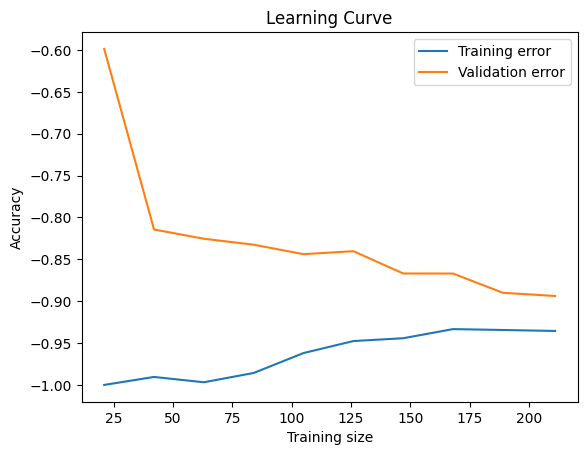

In [284]:
# Classification Prediction using Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

lmodel = LogisticRegression(max_iter=1000)
lmodel.fit(X_train, y_train)

y_pred = lmodel.predict(X_test)

accuracy = accuracy_score(y_test ,y_pred)
print(f"Accuracy Percentage: ", accuracy * 100)
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n", report)

train_sizes, train_scores, test_scores = learning_curve(
    lmodel, X, Y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, shuffle=True)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

Accuracy Percentage:  83.9622641509434
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.58      0.69      0.63        16
           2       0.96      0.85      0.90        53

    accuracy                           0.84       106
   macro avg       0.79      0.81      0.80       106
weighted avg       0.85      0.84      0.84       106



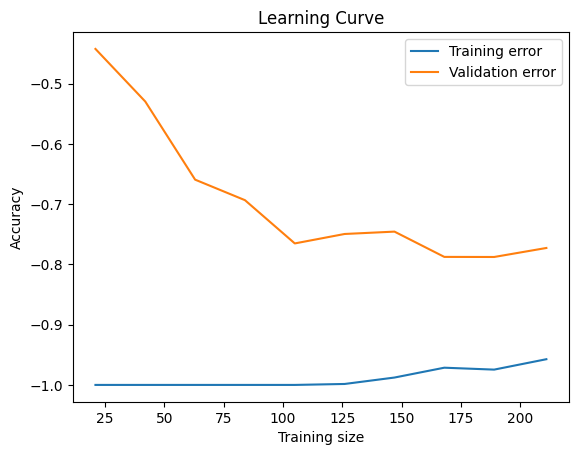

In [271]:
# Classification Prediction using Logisitic Regression with Polynomial Features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pmodel = LogisticRegression(max_iter=1000)
pmodel.fit(X_train_poly, y_train)

y_pred_poly = pmodel.predict(X_test_poly)

accuracy = accuracy_score(y_test ,y_pred_poly)
print(f"Accuracy Percentage: ", accuracy * 100)
report = classification_report(y_test, y_pred_poly)
print(f"Classification Report:\n", report)


X_poly = poly.fit_transform(X)
train_sizes, train_scores, test_scores = learning_curve(
    lmodel, X_poly, Y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, shuffle=True)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

Accuracy Percentage:  85.84905660377359
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        41
           1       0.88      0.41      0.56        17
           2       0.91      0.90      0.91        48

    accuracy                           0.86       106
   macro avg       0.86      0.77      0.79       106
weighted avg       0.87      0.86      0.84       106



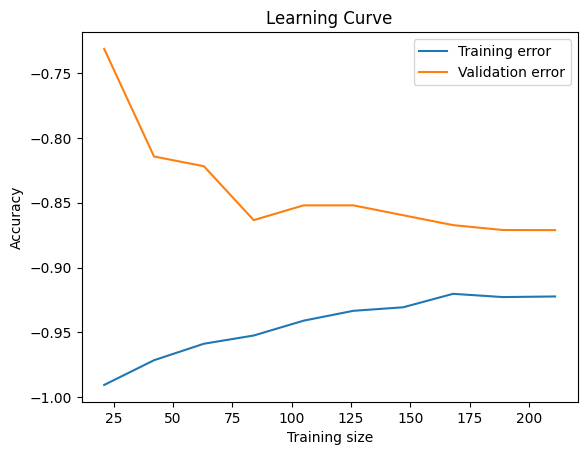

In [278]:
# Classification Prediction using Logistic Regression with Scaled Features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_model = LogisticRegression(max_iter=1000)
scaled_model.fit(X_train_scaled, y_train)

y_pred_scaled = scaled_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test ,y_pred_scaled)
print(f"Accuracy Percentage: ", accuracy * 100)
report = classification_report(y_test, y_pred_scaled)
print(f"Classification Report:\n", report)

X_scaled = scaler.fit_transform(X)
train_sizes, train_scores, test_scores = learning_curve(
    lmodel, X_scaled, Y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, shuffle=True)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

Accuracy Percentage:  88.67924528301887
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.67      0.67      0.67        15
           2       0.95      0.96      0.95        55

    accuracy                           0.89       106
   macro avg       0.83      0.83      0.83       106
weighted avg       0.89      0.89      0.89       106



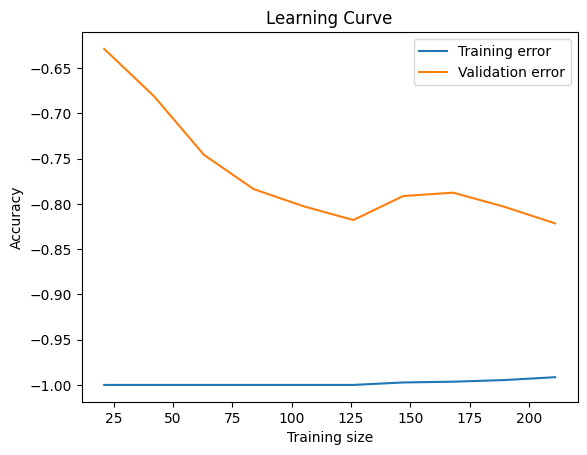

In [282]:
# Classification Prediction using Logistic Regression with Scaled/Polynomial Features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)


scaled_poly_model = LogisticRegression(max_iter=1000)
scaled_poly_model.fit(X_train_scaled_poly, y_train)

y_pred_scaled_poly = scaled_poly_model.predict(X_test_scaled_poly)

accuracy = accuracy_score(y_test ,y_pred_scaled_poly)
print(f"Accuracy Percentage: ", accuracy * 100)
report = classification_report(y_test, y_pred_scaled_poly)
print(f"Classification Report:\n", report)


X_scaled = scaler.fit_transform(X)
X_scaled_poly = poly.fit_transform(X_scaled) 
train_sizes, train_scores, test_scores = learning_curve(
    lmodel, X_scaled_poly, Y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, shuffle=True)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [301]:
# Classifying Diabetes using different classifiers
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print()

--- Random Forest ---
Accuracy: 0.9528301886792453
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.94      0.94      0.94        17
           2       0.98      0.92      0.95        53

    accuracy                           0.95       106
   macro avg       0.95      0.96      0.95       106
weighted avg       0.95      0.95      0.95       106


--- Support Vector Machine ---
Accuracy: 0.7075471698113207
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.78      0.68        36
           1       0.00      0.00      0.00        17
           2       0.78      0.89      0.83        53

    accuracy                           0.71       106
   macro avg       0.46      0.55      0.50       106
weighted avg       0.60      0.71      0.65       106


--- K-Nearest Neighbors ---
Accuracy: 0.7547169811320755
Classification Repor